In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
x_train = catalog.load('uci_energy_1.x_train')
y_train = catalog.load('uci_energy_1.y_train')

x_test = catalog.load('uci_energy_1.x_test')
y_test = catalog.load('uci_energy_1.y_test')
model = catalog.load('uci_energy_1.model')

2022-01-18 19:59:16,214 - kedro.io.data_catalog - INFO - Loading data from `uci_energy_1.x_train` (UCIDataSet)...
2022-01-18 19:59:16,228 - kedro.io.data_catalog - INFO - Loading data from `uci_energy_1.y_train` (UCIDataSet)...
2022-01-18 19:59:16,237 - kedro.io.data_catalog - INFO - Loading data from `uci_energy_1.x_test` (UCIDataSet)...
2022-01-18 19:59:16,244 - kedro.io.data_catalog - INFO - Loading data from `uci_energy_1.y_test` (UCIDataSet)...
2022-01-18 19:59:16,251 - kedro.io.data_catalog - INFO - Loading data from `uci_energy_1.model` (TFBoostDataSet)...


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.8)

In [5]:
model_tree = catboost.CatBoostRegressor(loss_function='RMSEWithUncertainty')
model_tree.fit(x_tr, y_tr, eval_set=(x_val, y_val), verbose=True)

0:	learn: 3.7054974	test: 3.7048297	best: 3.7048297 (0)	total: 46ms	remaining: 45.9s
1:	learn: 3.6727681	test: 3.6719131	best: 3.6719131 (1)	total: 46.6ms	remaining: 23.2s
2:	learn: 3.6465545	test: 3.6484455	best: 3.6484455 (2)	total: 47.1ms	remaining: 15.7s
3:	learn: 3.6260048	test: 3.6308738	best: 3.6308738 (3)	total: 47.6ms	remaining: 11.8s
4:	learn: 3.6004463	test: 3.6042894	best: 3.6042894 (4)	total: 47.9ms	remaining: 9.53s
5:	learn: 3.5818842	test: 3.5858687	best: 3.5858687 (5)	total: 48.2ms	remaining: 7.98s
6:	learn: 3.5628193	test: 3.5695366	best: 3.5695366 (6)	total: 48.7ms	remaining: 6.9s
7:	learn: 3.5446853	test: 3.5522776	best: 3.5522776 (7)	total: 49ms	remaining: 6.08s
8:	learn: 3.5263286	test: 3.5340396	best: 3.5340396 (8)	total: 49.3ms	remaining: 5.43s
9:	learn: 3.5072598	test: 3.5172231	best: 3.5172231 (9)	total: 49.7ms	remaining: 4.92s
10:	learn: 3.4893357	test: 3.4994181	best: 3.4994181 (10)	total: 49.9ms	remaining: 4.49s
11:	learn: 3.4718363	test: 3.4821532	best: 3.4

687:	learn: -0.9384712	test: 23.1678404	best: 1.1072331 (222)	total: 216ms	remaining: 97.7ms
688:	learn: -0.9403476	test: 23.3430264	best: 1.1072331 (222)	total: 216ms	remaining: 97.4ms
689:	learn: -0.9415584	test: 23.4912970	best: 1.1072331 (222)	total: 216ms	remaining: 97.1ms
690:	learn: -0.9434792	test: 23.6725204	best: 1.1072331 (222)	total: 216ms	remaining: 96.7ms
691:	learn: -0.9442602	test: 23.8634550	best: 1.1072331 (222)	total: 217ms	remaining: 96.4ms
692:	learn: -0.9454195	test: 24.0510755	best: 1.1072331 (222)	total: 217ms	remaining: 96.1ms
693:	learn: -0.9485484	test: 24.1726523	best: 1.1072331 (222)	total: 217ms	remaining: 95.7ms
694:	learn: -0.9513224	test: 24.3505381	best: 1.1072331 (222)	total: 217ms	remaining: 95.4ms
695:	learn: -0.9535147	test: 24.4939435	best: 1.1072331 (222)	total: 218ms	remaining: 95.1ms
696:	learn: -0.9541902	test: 24.7067227	best: 1.1072331 (222)	total: 218ms	remaining: 94.7ms
697:	learn: -0.9568694	test: 24.8752329	best: 1.1072331 (222)	total: 2

In [6]:
y_test_catboost = model_tree.predict(x_test)
y_test_catboost_treeflow = model.tree_model.predict(x_test)

y_test_samples = model.sample(x_test, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

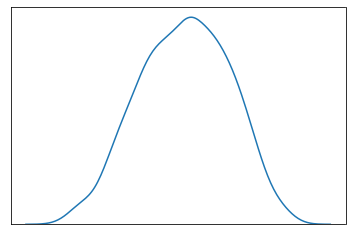

In [7]:
# x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
# plt.plot(x, stats.norm.pdf(x), label='norm pdf')
sns.kdeplot(y_test_samples[5, :])
plt.xticks([])
plt.yticks([])
plt.ylabel('')
plt.show()

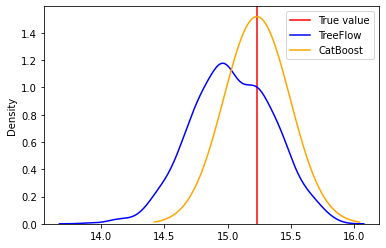

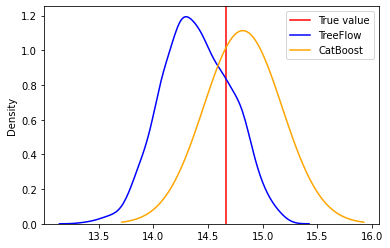

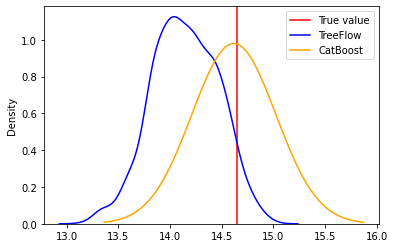

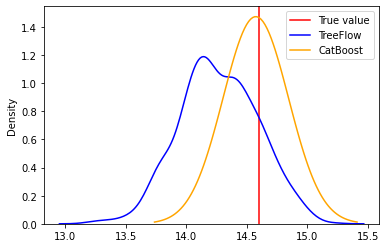

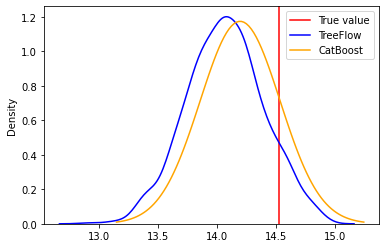

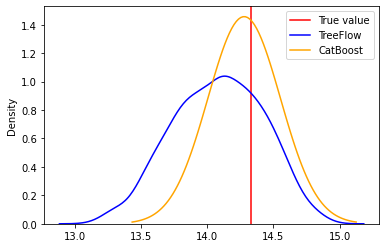

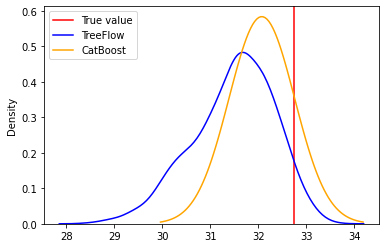

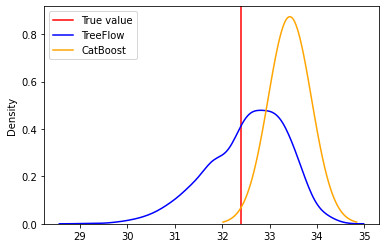

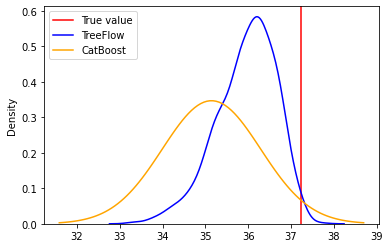

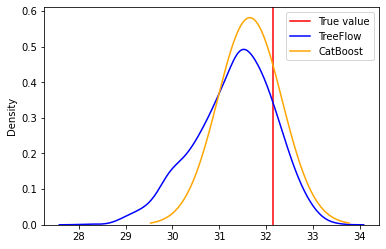

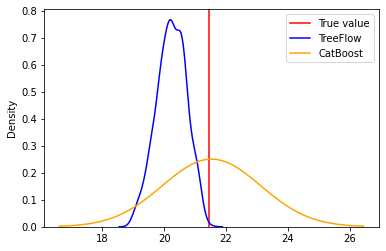

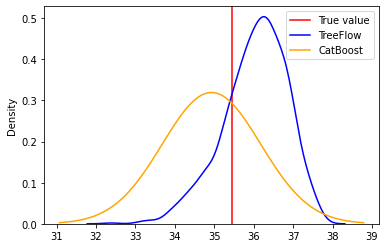

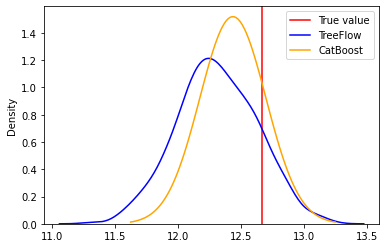

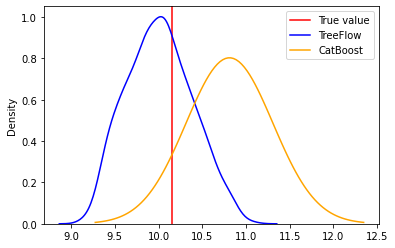

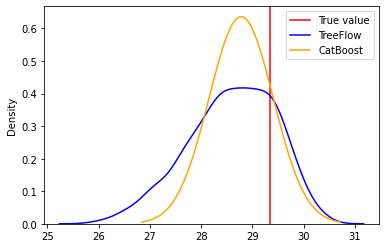

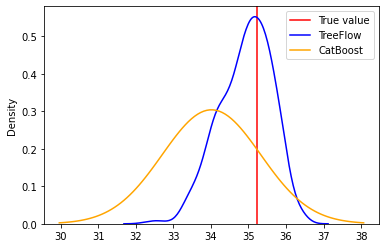

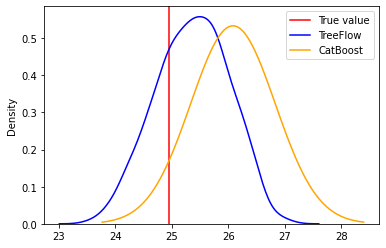

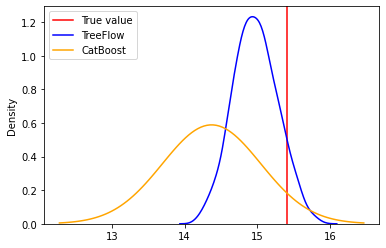

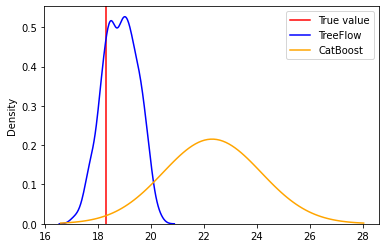

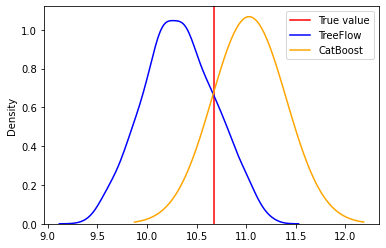

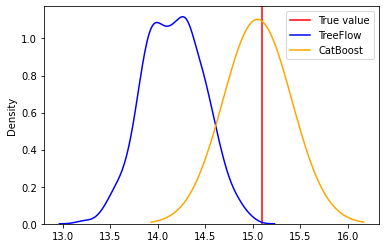

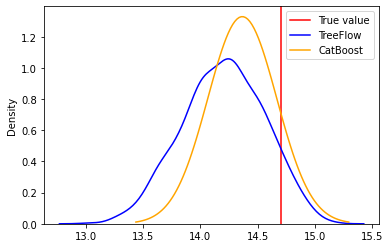

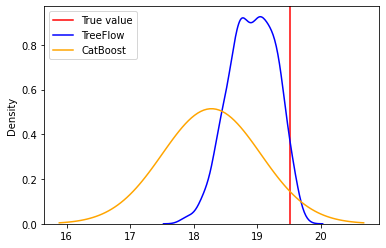

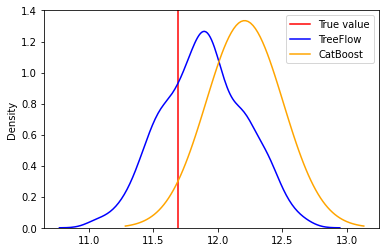

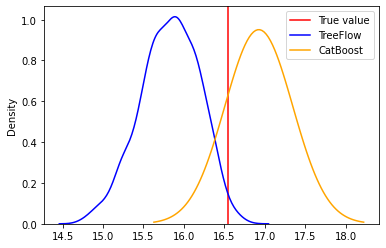

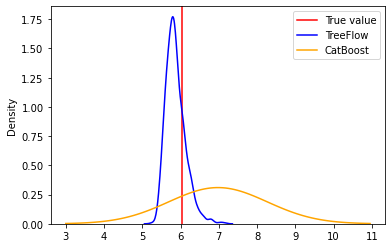

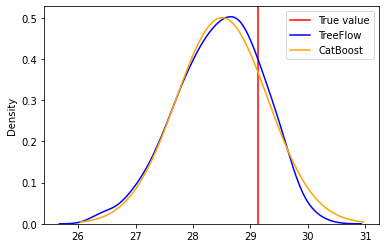

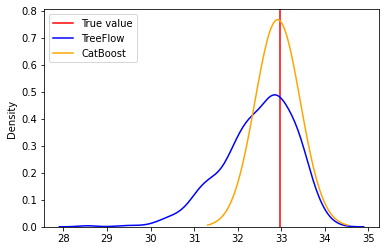

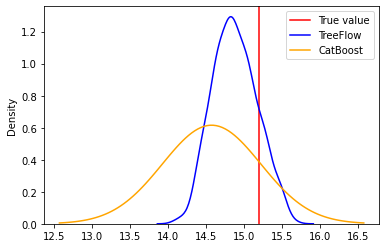

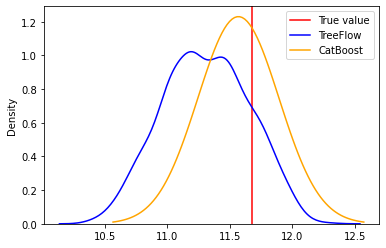

In [8]:
for i in range(30):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()